In [1]:
import numpy as np
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Input
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns


2025-12-05 11:31:23.218064: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-05 11:31:23.218648: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-05 11:31:23.267366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-05 11:31:24.454541: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
# Download data
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Normalize inputs
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# One-hot output vectors
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, 10)

In [3]:
def define_functional_model():
    inputs = Input(shape=(32, 32, 3), name="input_layer")
    x = Conv2D(32, (3, 3), use_bias=False, activation='relu', padding='same', name='block1_conv1')(inputs)
    x = Conv2D(32, (3, 3), use_bias=False, activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)
    x = Dropout(0.2, name='block1_dropout')(x)
    x = Conv2D(64, (3, 3), use_bias=False, activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(64, (3, 3), use_bias=False, activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), name='block2_pool')(x)
    x = Dropout(0.2, name='block2_dropout')(x)
    x = Conv2D(128, (3, 3), use_bias=False, activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(128, (3, 3), use_bias=False, activation='relu', padding='same', name='block3_conv2')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)
    x = Dropout(0.2, name='block3_dropout')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(128, use_bias=False, activation='relu', kernel_initializer='he_uniform', name='fc1')(x)
    x = Dropout(0.2, name='fc1_dropout')(x)
    outputs = Dense(10, use_bias=False, activation='softmax', name='predictions')(x)
    
    model = Model(inputs=inputs, outputs=outputs, name="cifar10_functional_cnn")
    
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = define_functional_model()
model.summary()


2025-12-05 11:31:35.821891: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "cifar10_functional_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_dropout (Dropout)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_dropout (Dropout)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_dropout (Dropout)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1_dropout (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         1,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,984 (2.10 MB)

 Trainable params: 549,984 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:

# Train model (use one-hot labels)
history = model.fit(
    train_data, train_labels_onehot,       # training data (one-hot labels)
    batch_size=64,                        # batch size
    epochs=100,                            # Maximum number of epochs
    validation_split=0.1,                  # Percentage of training data used for validation
)

# Test model: get class predictions and evaluate with one-hot labels
predictions_keras = np.argmax(model.predict(test_data, verbose=0), axis=1)
test_loss, test_accuracy = model.evaluate(test_data, test_labels_onehot, verbose=0)
print(f"Test accuracy: {test_accuracy}")
model.save("CIFAR_v19_vgg.keras")

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.1398 - loss: 2.2258 - val_accuracy: 0.2168 - val_loss: 2.1280
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.2609 - loss: 1.9980 - val_accuracy: 0.3172 - val_loss: 1.9198
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.3138 - loss: 1.8880 - val_accuracy: 0.3554 - val_loss: 1.7948
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.3500 - loss: 1.7950 - val_accuracy: 0.3918 - val_loss: 1.6946
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.3799 - loss: 1.7116 - val_accuracy: 0.4210 - val_loss: 1.6097
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.4072 - loss: 1.6320 - val_accuracy: 0.4498 - val_loss: 1.5315
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.4331 - loss: 1.5579 - val_accuracy: 0.4790 - val_loss: 1.4405
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.4566 - loss: 1

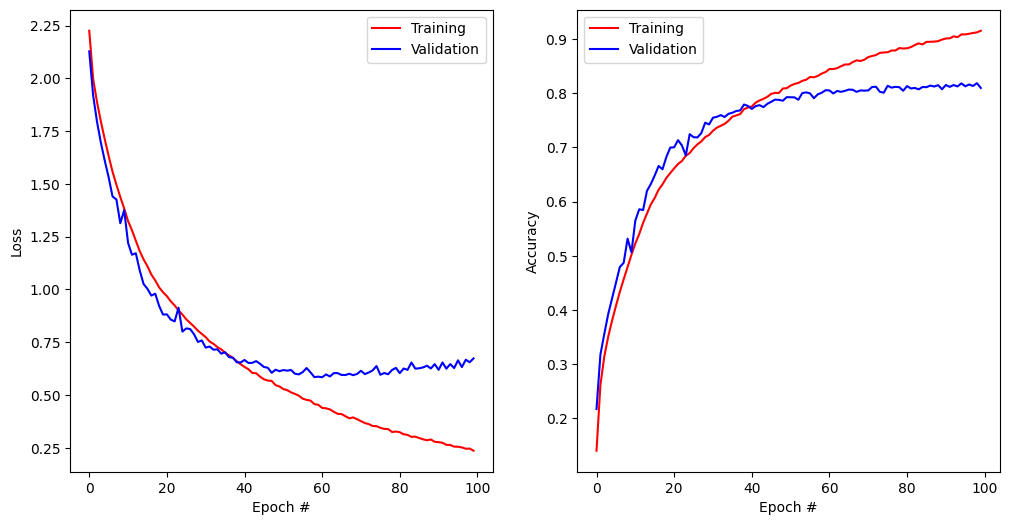

In [5]:

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [6]:
import ANNarchy
from ANNarchy.extensions.ann_to_snn_conversion import ANNtoSNNConverter
ANNarchy.clear()
snn_converter = ANNtoSNNConverter(
    input_encoding='IB', 
    hidden_neuron='IaF',
    read_out='spike_count',
)


ANNarchy 4.8 (4.8.2.5) on linux (posix).


In [7]:
net = snn_converter.load_keras_model("CIFAR_v19_vgg.keras", show_info=True)

* Input layer: input_layer, (32, 32, 3)
* InputLayer skipped.
* Conv2D layer: block1_conv1, (32, 32, 32) 
* Conv2D layer: block1_conv2, (32, 32, 32) 
* MaxPooling2D layer: block1_pool, (16, 16, 32) 
* Dropout skipped.
* Conv2D layer: block2_conv1, (16, 16, 64) 
* Conv2D layer: block2_conv2, (16, 16, 64) 
* MaxPooling2D layer: block2_pool, (8, 8, 64) 
* Dropout skipped.
* Conv2D layer: block3_conv1, (8, 8, 128) 
* Conv2D layer: block3_conv2, (8, 8, 128) 
* MaxPooling2D layer: block3_pool, (4, 4, 128) 
* Dropout skipped.
* Flatten skipped.
* Dense layer: fc1, 128 
    weights: (128, 2048)
    mean -0.0014992482028901577, std 0.03491145744919777
    min -0.1446417272090912, max 0.14347508549690247
* Dropout skipped.
* Dense layer: predictions, 10 
    weights: (10, 128)
    mean 0.006046104244887829, std 0.19552208483219147
    min -0.4770316779613495, max 0.48586973547935486



In [8]:
predictions_snn = snn_converter.predict(test_data[:300], duration_per_sample=2000)

100%|██████████| 300/300 [22:24:02<00:00, 268.81s/it]     


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.88      0.96      0.92        24
           2       0.72      0.67      0.69        27
           3       0.56      0.66      0.60        29
           4       0.84      0.70      0.76        23
           5       0.56      0.68      0.61        28
           6       0.96      0.79      0.87        34
           7       0.81      0.81      0.81        27
           8       0.89      0.92      0.91        37
           9       0.84      0.89      0.86        35

    accuracy                           0.79       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.80      0.79      0.79       300

Test accuracy of the SNN: 0.79


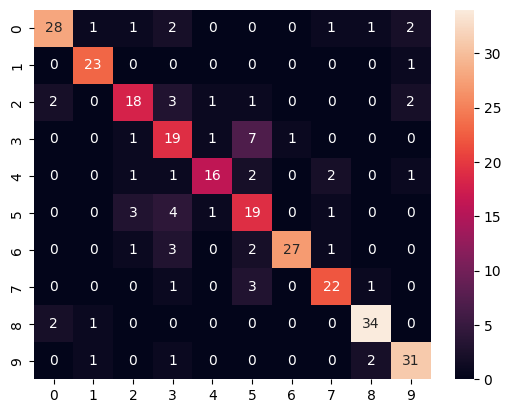

In [9]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
import numpy as np
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(test_labels[:300], predictions_snn), annot=True)
print(classification_report(test_labels[:300], predictions_snn))
print("Test accuracy of the SNN:", accuracy_score(test_labels[:300], predictions_snn))

In [10]:
model = tf.keras.models.load_model('CIFAR_v19_vgg.keras')
loss, accuracy = model.evaluate(test_data, test_labels_onehot, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8001 - loss: 0.6940


In [11]:
print(f"Test accuracy of the ANN: {accuracy:.4f}")
print("Test accuracy of the SNN:", accuracy_score(test_labels[:300], predictions_snn))

Test accuracy of the ANN: 0.8001
Test accuracy of the SNN: 0.79
